In [135]:
#import libraries

import random
import bisect
import numpy as np# Define input features:
from numpy import random
from IPython.display import clear_output

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt




# variable inputs
SEED = None
MAXSEEDSEQ = 100000
u1count = 0
counter = 0

# *** OUTPUT: customer_times[] contains customer arrival times tuple (customer #, arrival time (hr))

## code below

random.seed(SEED)
U1 = [random.uniform(0,1) for i in range(MAXSEEDSEQ)] # contains sequence of random #s U(0,1)
poisson1rate = [0] # stores uniform poisson arrival rates lambda == 1


#define inverse transform functions here

def eq1(x): return (x/0.258)
def eq2(x): return (x+3.95)/1.048
def eq3(x): return ((x+2.2)/.874)
def eq4(x): return ((x+15)/1.626)
def eq5(x): return ((x+7.76)/1.282)
def eq6(x): return ((x+30.72)/2.28)

vhrthin = pd.read_csv("thinningdata.csv")


for i in range(24):
    test = poisson1rate[i] - np.log(U1[counter])
    while (test >= 21.72 and eq6(test) >= 24) or test >= 24: # trim domain/range [0,24) of poisson generated value
        counter += 1
        test = poisson1rate[i] - np.log(U1[counter])  
        
    poisson1rate.append(test)
    counter += 1

poisson1rate.pop(0) # in place
    


#cdf inv equations

'''
eq1: y=.214x + 0.22 inv_range: (0,1.29) [0-5] eq1

eq2: y=1.048x - 3.95 range: 1.29-6.53 [5-10] eq2

eq3: y=0.874x - 2.2 range: 6.53-12.65 [10-17] eq3 

eq4: y=1.626x - 15 range: 12.65-19.156 [17-21] eq4

eq5: y= 1.282x - 7.76 range: 19.156 - 21.72 [21-23] eq5

eq6: y=2.28x - 30.72, range: 21.72-24 [23-24] eq6
'''


flist = [0,eq1,eq2,eq3,eq4,eq5,eq6]

# define right sets inverse domain = f(x) range
places = [
    (1.29, '1'),
    (6.53, '2'),
    (12.65, '3'),
    (19.156, '4'),
    (21.72, '5'),
    (24, '6')
]

places.sort() # list must be sorted
pos_log = []

for to_find in poisson1rate:
    pos = bisect.bisect_right(places, (to_find,))
    pos_log.append(pos)
  #  print ('%s -> %s' % (to_find, places[pos]))

times_list = [(poisson1rate[x],places[pos_log[x]]) for x in range(len(pos_log))]

customer = 1
customer_times = []

for x in range(len(times_list)):
    arrtime = flist[int(times_list[x][1][1])](times_list[x][0])
    customer_times.append((customer, arrtime))
    customer += 1

0

'\neq1: y=.214x + 0.22 inv_range: (0,1.29) [0-5] eq1\n\neq2: y=1.048x - 3.95 range: 1.29-6.53 [5-10] eq2\n\neq3: y=0.874x - 2.2 range: 6.53-12.65 [10-17] eq3 \n\neq4: y=1.626x - 15 range: 12.65-19.156 [17-21] eq4\n\neq5: y= 1.282x - 7.76 range: 19.156 - 21.72 [21-23] eq5\n\neq6: y=2.28x - 30.72, range: 21.72-24 [23-24] eq6\n'

In [136]:
customer_times ##print customer times (hrs ie 18.60 == 6:36PM)

cus_pts =np.array([[customer_times[x][0],customer_times[x][1]] for x in range(len(customer_times))])

cus_pts

p_pts = np.array([poisson1rate])

p_pts = p_pts.T

p_pts = np.insert(p_pts, 0, 0, axis=1)

p_pts

[(1, 2.9560603275678243),
 (2, 3.5000571480922553),
 (3, 4.2343750908347415),
 (4, 5.932149500095184),
 (5, 6.650539221308406),
 (6, 7.24258681649944),
 (7, 7.463515530942368),
 (8, 7.9585070608413835),
 (9, 8.2224071620499),
 (10, 9.190026518527183),
 (11, 10.390313766722047),
 (12, 10.80558166082864),
 (13, 16.70643012760689),
 (14, 17.065826228794045),
 (15, 17.63822587863094),
 (16, 18.891641727611614),
 (17, 18.980197220356352),
 (18, 19.28631471588898),
 (19, 19.727462712784366),
 (20, 21.179066029280612),
 (21, 23.21125091006566),
 (22, 23.615545675887862),
 (23, 23.754624334483037),
 (24, 23.829188268302648)]

array([[ 1.        ,  2.95606033],
       [ 2.        ,  3.50005715],
       [ 3.        ,  4.23437509],
       [ 4.        ,  5.9321495 ],
       [ 5.        ,  6.65053922],
       [ 6.        ,  7.24258682],
       [ 7.        ,  7.46351553],
       [ 8.        ,  7.95850706],
       [ 9.        ,  8.22240716],
       [10.        ,  9.19002652],
       [11.        , 10.39031377],
       [12.        , 10.80558166],
       [13.        , 16.70643013],
       [14.        , 17.06582623],
       [15.        , 17.63822588],
       [16.        , 18.89164173],
       [17.        , 18.98019722],
       [18.        , 19.28631472],
       [19.        , 19.72746271],
       [20.        , 21.17906603],
       [21.        , 23.21125091],
       [22.        , 23.61554568],
       [23.        , 23.75462433],
       [24.        , 23.82918827]])

array([[ 0.        ,  0.76266356],
       [ 0.        ,  0.90301474],
       [ 0.        ,  1.09246877],
       [ 0.        ,  2.26689268],
       [ 0.        ,  3.0197651 ],
       [ 0.        ,  3.64023098],
       [ 0.        ,  3.87176428],
       [ 0.        ,  4.3905154 ],
       [ 0.        ,  4.66708271],
       [ 0.        ,  5.68114779],
       [ 0.        ,  6.88113423],
       [ 0.        ,  7.24407837],
       [ 0.        , 12.40141993],
       [ 0.        , 12.74903345],
       [ 0.        , 13.67975528],
       [ 0.        , 15.71780945],
       [ 0.        , 15.86180068],
       [ 0.        , 16.35954773],
       [ 0.        , 17.07685437],
       [ 0.        , 19.39156265],
       [ 0.        , 22.20165207],
       [ 0.        , 23.12344414],
       [ 0.        , 23.44054348],
       [ 0.        , 23.61054925]])

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Integrated linear function poisson constant arrival rates $\\lambda$(t)')

Text(0.5, 0, 'Hour in Day (t)')

Text(0, 0.5, 'Integral of Poisson arrival rate(t)')

([<matplotlib.axis.XTick at 0x7fa1c6f7fc10>,
 <a list of 24 Text major ticklabel objects>)

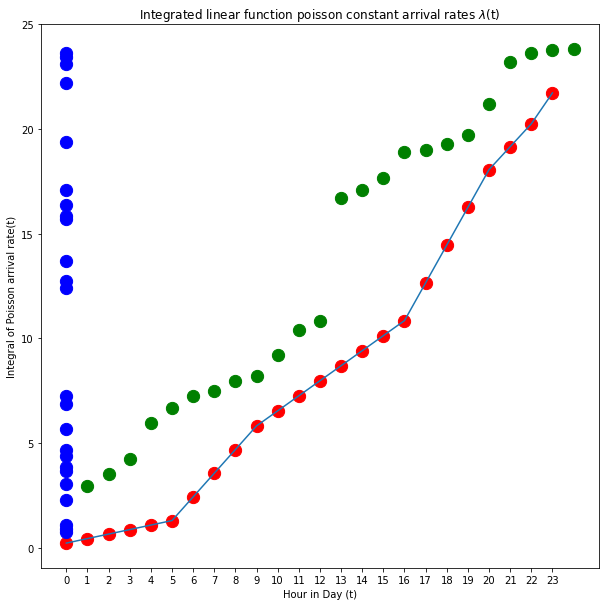

In [137]:
## Graph integral of poisson arrival non-stationary function lamda(t) wrt time t

plt.figure(figsize=(10,10))
plt.plot(vhrthin.index, vhrthin.vcumsum)
plt.title(r'Integrated linear function poisson constant arrival rates $\lambda$(t)')
plt.xlabel('Hour in Day (t)')
plt.ylabel(r'Integral of Poisson arrival rate(t)')
plt.xticks(np.arange(24))
plt.scatter(vhrthin.index,vhrthin.vcumsum,s=150,color='r', zorder=2)
plt.scatter(p_pts[:,0],p_pts[:,1],s=150,color='b', zorder=2)
plt.scatter(cus_pts[:,0],cus_pts[:,1],s=150,color='g', zorder=2)

In [92]:
vhrthin

,hr,poisson,hrtime,perhr,vcumsum
0,0,1.291667,0,0.215278,0.215278
1,1,1.291667,60,0.215278,0.430556
2,2,1.291667,120,0.215278,0.645833
3,3,1.291667,180,0.215278,0.861111
4,4,1.291667,240,0.215278,1.076389
5,5,1.291667,300,0.215278,1.291667
6,6,4.523810,360,1.130952,2.422619
7,7,4.523810,420,1.130952,3.553571
8,8,4.523810,480,1.130952,4.684524
9,9,4.523810,540,1.130952,5.815476
